**Task 3(a): Take grayscale image of size 512x512, apply average & median spatial filters with 5x5 mask & observe their performance for noise suppression in term of PSNR**

### Importing the Libraries

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for Average Spatial Filter
- **Function: output_image = cv2.blur(input_image, (kernel_size, kernel_size))**

In [48]:
def average_filter(image, mask_size):
    filtered_image = []
    height, width = image.shape
    offset, weight = mask_size // 2, mask_size * mask_size

    for r in range(height):
        nth_row = []
        for c in range(width):
            pixel = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        pixel += (image[r + x, c + y] / weight)
            nth_row.append(pixel)
        filtered_image.append(nth_row)

    return np.uint8(filtered_image)

### Function for Median Spatial Filter
- **Function: output_image = cv2.medianBlur(input_image, kernel_size)**

In [49]:
def median_filter(image, mask_size):
    filtered_image = []
    height, width = image.shape
    offset = mask_size // 2

    for r in range(height):
        nth_row = []
        for c in range(width):
            pixels = []
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        pixels.append(image[r + x, c + y])
            pixels.sort()
            nth_row.append(pixels[len(pixels) // 2])
        filtered_image.append(nth_row)

    return np.uint8(filtered_image)

### Function for adding Salt & Pepper Noise

In [50]:
def add_salt_pepper_noise(image, percent):
    noisy_image = image.copy()
    noise_amount = (image.shape[0] * image.shape[1]) * (percent / 100)

    for k in range(int(noise_amount)):
        index = []
        for x in range(1, 5):
            index.append(np.random.randint(0, image.shape[0]))
        noisy_image[index[0], index[1]], noisy_image[index[2], index[3]] = 0, 255

    return noisy_image

### Function for calculating PSNR (Peak Signal to Noise Ratio)
- **Function: psnr = cv2.PSNR(image1, image2)**

In [51]:
def compute_psnr(image1, image2):
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1 - image2) ** 2) 
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)
    return round(psnr, 2)

### Loading the Image

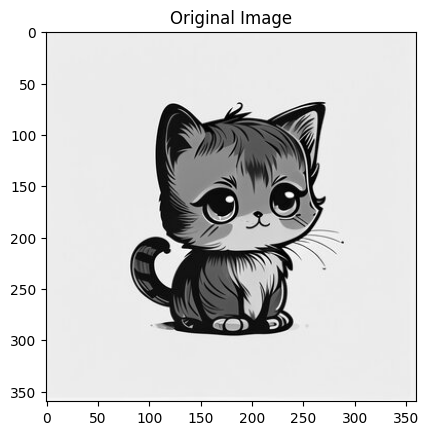

In [52]:
cat_image = cv2.imread("./Cat 360x360.jpg", 0)
plt.imshow(cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()

### Adding Salt & Pepper Noise to the Image

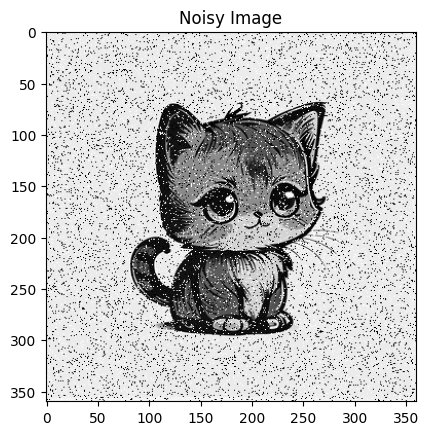

PSNR = 12.75


12.749599925582986

In [53]:
noisy_cat_image = add_salt_pepper_noise(cat_image, 7)
plt.imshow(cv2.cvtColor(noisy_cat_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.show()
psnr = image_psnr(cat_image, noisy_cat_image)
print(f"PSNR = {psnr}")
cv2.PSNR(cat_image, noisy_cat_image)

### Applying Average Spatial Filter

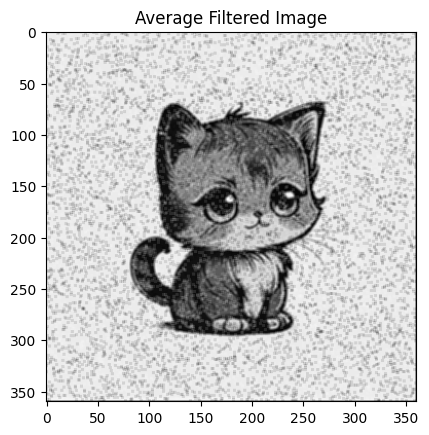

PSNR = 18.8


In [54]:
avg_cat_image = average_filter(noisy_cat_image, 3)
plt.imshow(cv2.cvtColor(avg_cat_image, cv2.COLOR_BGR2RGB))
plt.title("Average Filtered Image")
plt.show()
psnr = compute_psnr(cat_image, avg_cat_image)
print(f"PSNR = {psnr}")

### Applying Median Spatial Filter 

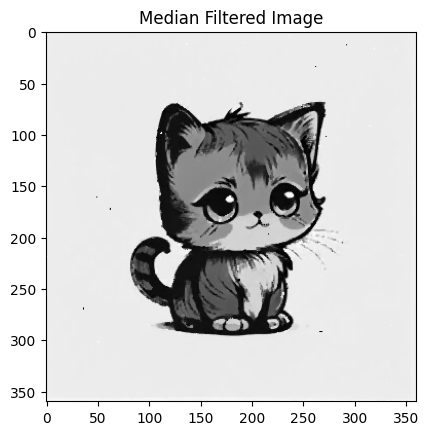

PSNR = 25.58


In [55]:
median_cat_image = median_filter(noisy_cat_image, 3)
plt.imshow(cv2.cvtColor(median_cat_image, cv2.COLOR_BGR2RGB))
plt.title("Median Filtered Image")
plt.show()
psnr = compute_psnr(cat_image, median_cat_image)
print(f"PSNR = {psnr}")

### Loading the Book Example Image

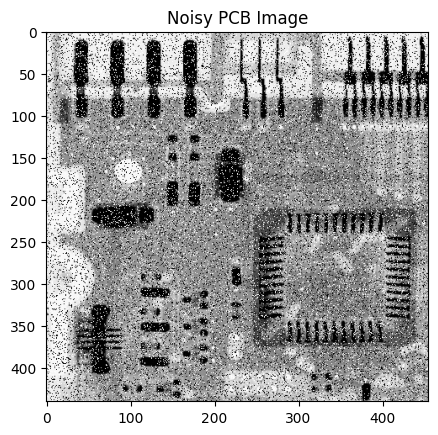

In [56]:
pcb_image = cv2.imread("./Fig0335(a) PCB Salt-&-Pepper 455x440.tif", 0)
plt.imshow(cv2.cvtColor(pcb_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy PCB Image")
plt.show()

### Applying Average Spatial Filter in Book Example Image

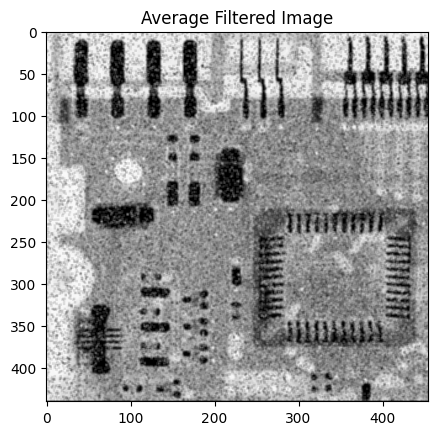

In [57]:
avg_filtered_pcb_image = average_filter(pcb_image, 3)
plt.imshow(cv2.cvtColor(avg_filtered_pcb_image, cv2.COLOR_BGR2RGB))
plt.title("Average Filtered Image")
plt.show()

### Applying Median Spatial Filter in Book Example Image

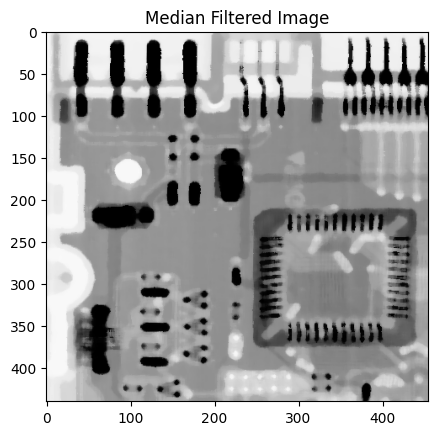

In [58]:
median_pcb_image = median_filter(pcb_image, 7)
plt.imshow(cv2.cvtColor(median_pcb_image, cv2.COLOR_BGR2RGB))
plt.title("Median Filtered Image")
plt.show()